In [1]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
import hess.loss_surfaces as loss_surfaces
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets

In [2]:
def twospirals(n_points, noise=.5, random_state=920):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [3]:
X, Y = twospirals(500, noise=1.3)

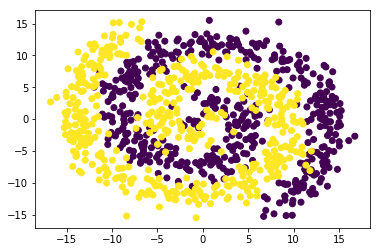

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [5]:
train_x = torch.FloatTensor(X)

In [6]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [7]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(2)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [8]:
optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=3, hidden_size=10,
                     activation=torch.nn.ELU(), bias=True)

In [9]:
print(sum(p.numel() for p in optimus.net.parameters()))

261


In [10]:
if use_cuda:
    optimus = optimus.cuda()

In [12]:
optimus.train_net(print_loss=True, lr=0.01, iters=1000,
                 loss_func=torch.nn.BCEWithLogitsLoss())

tensor(0.1489, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.6312, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6994, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.0058, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8504, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5940, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.3097, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.9831, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2421, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.9902, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.4680, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.3395, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5383, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.7435, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.7405, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5207, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1487, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1487, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1487, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1481, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1481, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1474, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1475, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1475, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1474, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1474, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1474, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1472, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1495, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1495, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1495, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1491, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1487, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1481, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1472, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1467, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1468, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1470, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1475, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1482, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1488, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1491, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1496, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1496, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1496, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1491, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1485, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1469, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1458, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


## Let's get this bread

In [ ]:
import hess.utils as utils

In [ ]:
model = optimus.net.cuda()
par_list = model.parameters()
n_par = sum(torch.numel(p) for p in par_list)

In [ ]:
hessian = torch.zeros(n_par, n_par)
for pp in range(n_par):
    base_vec = torch.zeros(n_par).unsqueeze(0).cuda()
    base_vec[0, pp] = 1.
    
    base_vec = utils.unflatten_like(base_vec, model.parameters())
    utils.eval_hess_vec_prod(base_vec, model.parameters(),
                            net=model,
                            criterion=torch.nn.BCEWithLogitsLoss(),
                            inputs=train_x, targets=train_y)
    if pp == 0:
        output = utils.gradtensor_to_tensor(model, include_bn=True)
        hessian = torch.zeros(output.nelement(), output.nelement())
        hessian[:, pp] = output
    
#     print(pp)
    hessian[:, pp] = utils.gradtensor_to_tensor(optimus.net, include_bn=True).cpu()

In [ ]:
hessian = hessian.cpu()

In [ ]:
plt.imshow(hessian)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
e_val, e_vec = np.linalg.eig(hessian.cpu())
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

In [ ]:
ne = e_val.div(torch.sum(e_val))
plt.plot(np.cumsum(ne[:50].cpu()), marker=".")

In [ ]:
plt.plot(np.log(np.abs(e_val)))

## Save model to use on laptop

In [ ]:
torch.save(optimus.net.state_dict(), "../hess/saved-models/spirals.pt")
saved_pars = optimus.net.state_dict()

In [ ]:
torch.save(hessian, "../hess/saved-models/spirals_hessian.pt")

## Do Some Perturbing

In [13]:
torch.set_default_tensor_type(torch.FloatTensor)
optimus = optimus.cpu();

In [14]:
from hess.plotting import plot_decision_boundary

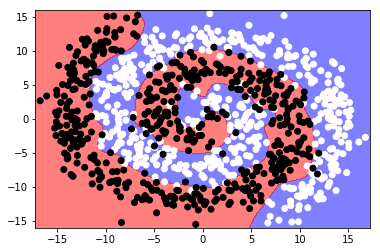

In [15]:
plot_decision_boundary(train_x, train_y, optimus, use_cuda=False,
                      buffer=0.5, h=0.1)

## Average Over Large Curvature Perturbations

In [ ]:
buffer = 0.3
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [27]:
n_vec = 3
scale = 0.0
basis = e_vec[:, :n_vec]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(optimus.net(in_grid, temp=1.).squeeze().cpu())

In [28]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

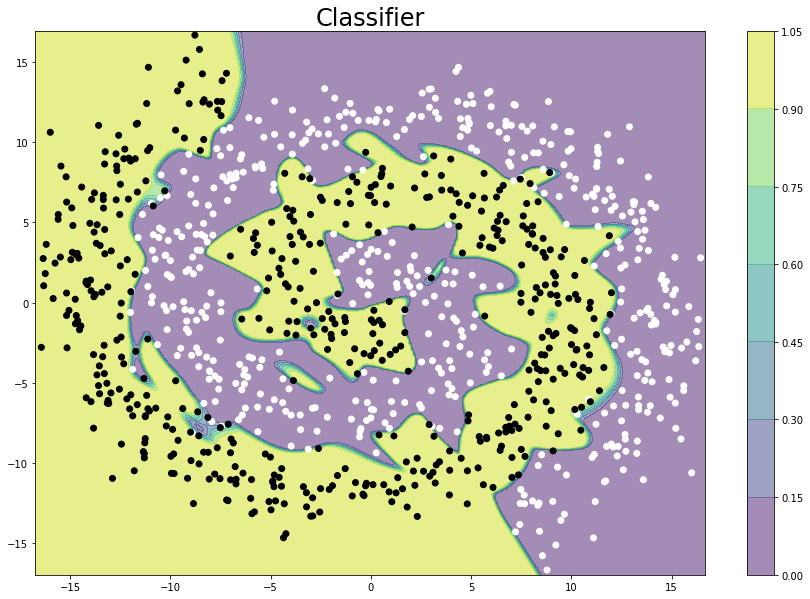

In [79]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.title("Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)
plt.savefig("./two-spiral-classifier.pdf", bbox_inches="tight")

## Small Curvature

In [30]:
n_vec = 3
scale = 0.5
basis = e_vec[:, -n_vec:]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(optimus(in_grid).squeeze().cpu())

In [31]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

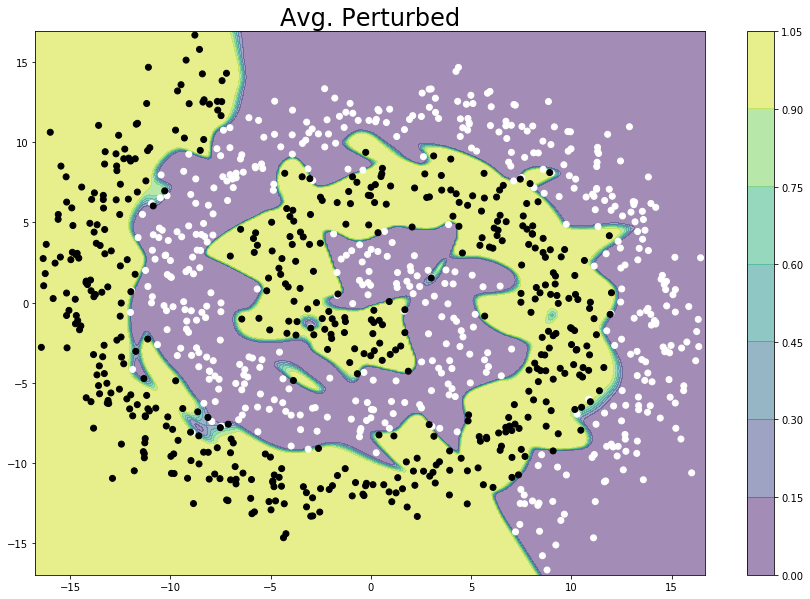

In [32]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
plt.title("Avg. Perturbed", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## Get Loss Surfaces

In [58]:
basis = e_vec
full_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

In [59]:
nvec = 3
basis = e_vec[:, :nvec]
high_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

In [118]:
nvec = 1750
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

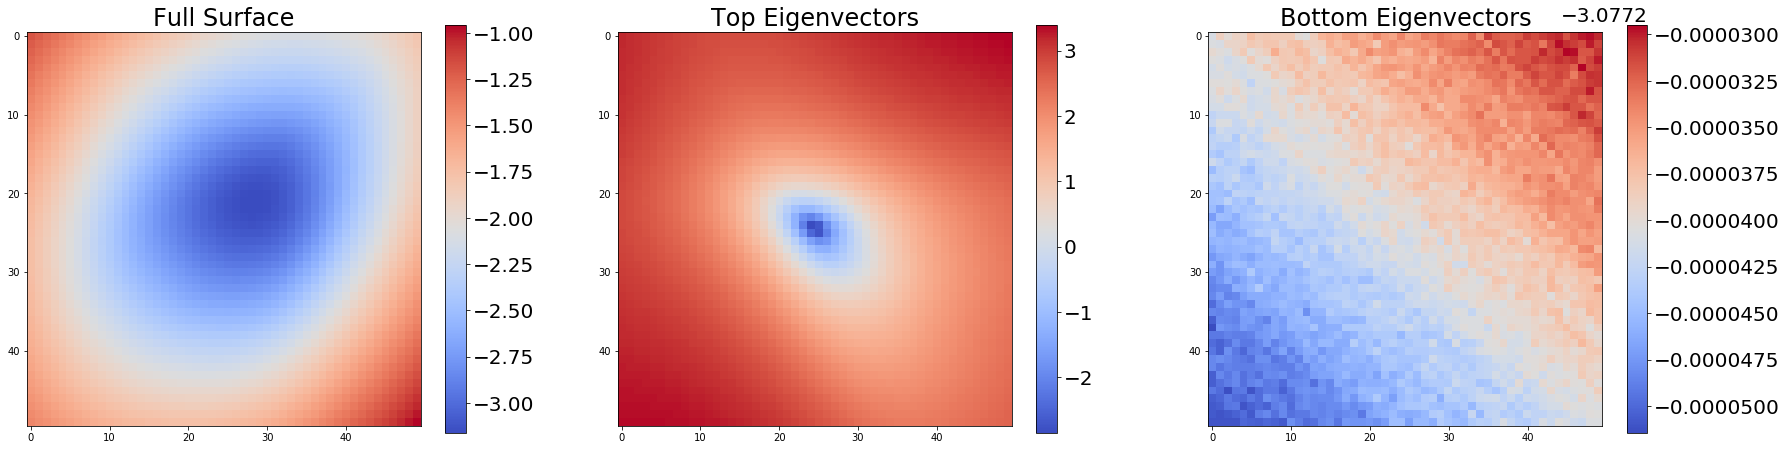

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(30, 7.5))
im = ax[0].imshow(full_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Full Surface",
               fontsize=24)

im = ax[1].imshow(high_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[1])
cbar.ax.tick_params(labelsize=20)
ax[1].set_title("Top Eigenvectors",
               fontsize=24)

im = ax[2].imshow(low_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[2].set_title("Bottom Eigenvectors",
               fontsize=24);
plt.savefig("./spiral-loss-surface.pdf", bbox_inches="tight")
plt.show()

In [84]:
nvec = 1000
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

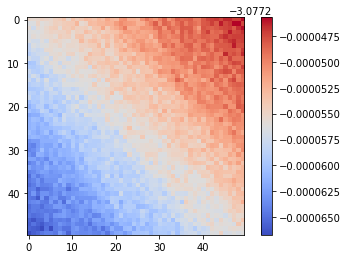

In [85]:
plt.imshow(low_loss_surface.log().detach(), cmap="coolwarm")
plt.colorbar()

In [120]:
nvec = 1750
basis = e_vec
ls1 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)

In [121]:
basis = e_vec[:, -n_vec:]
ls2 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)
ls3 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)

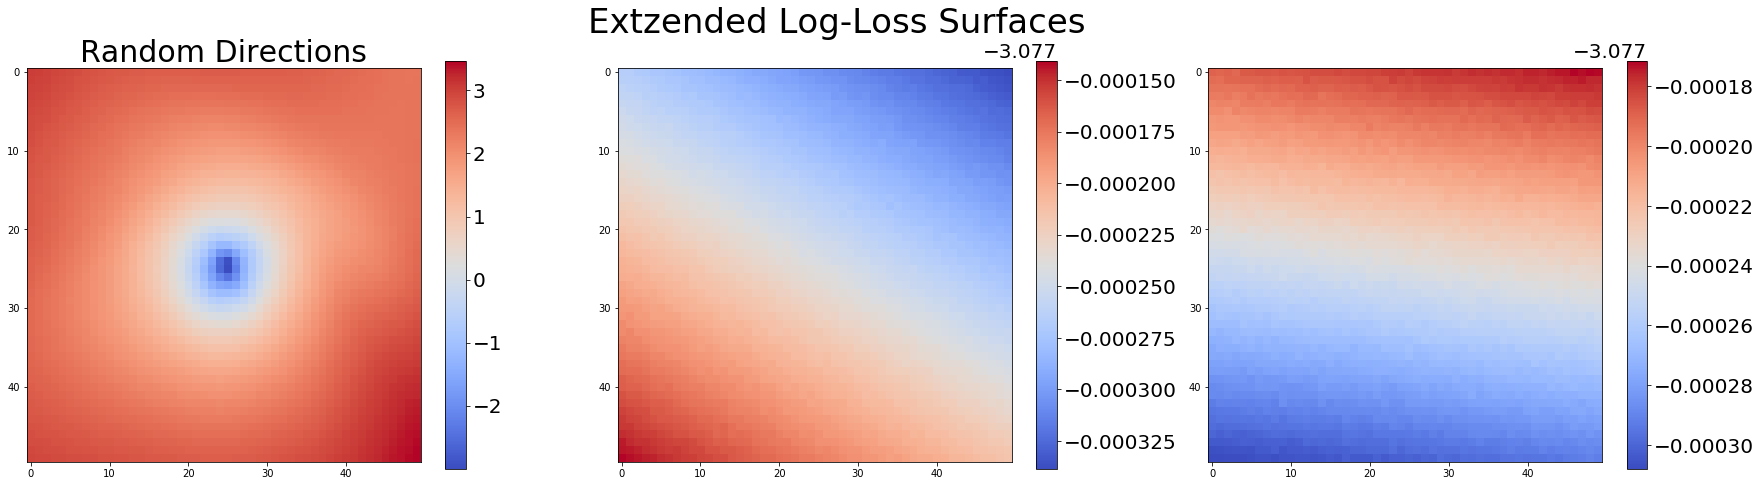

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(30, 7.5))
im = ax[0].imshow(ls1.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Random Directions",
               fontsize=30)

im = ax[1].imshow(ls2.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[1])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
# ax[1].set_title("Top Eigenvectors",
#                fontsize=24)

im = ax[2].imshow(ls3.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
# ax[2].set_title("Bottom Eigenvectors",
#                fontsize=24);
fig.suptitle("Extzended Log-Loss Surfaces", fontsize=34)
plt.savefig("./ext-loss-surface.pdf", bbox_inches="tight")
plt.show()